In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
data_files=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']

In [77]:
data=[]

for i in data_files:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0,usecols=['Date','Close/Last'])
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    data.append(temp)

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [79]:
df=data[-1]


In [81]:
data = df.filter(['Close'])
dataset = data.values
training_data_len=2487

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [83]:

train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(7, len(train_data)):
    x_train.append(train_data[i-7:i, 0])
    y_train.append(train_data[i, 0])

In [84]:

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [85]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2480/2480 [==============================] - 43s 15ms/step - loss: 0.0027
Epoch 2/10
2480/2480 [==============================] - 41s 17ms/step - loss: 7.2768e-04
Epoch 3/10
2480/2480 [==============================] - 45s 18ms/step - loss: 6.2583e-04
Epoch 4/10
2480/2480 [==============================] - 45s 18ms/step - loss: 4.6625e-04
Epoch 5/10
2480/2480 [==============================] - 45s 18ms/step - loss: 4.0540e-04
Epoch 6/10
2480/2480 [==============================] - 45s 18ms/step - loss: 3.8990e-04
Epoch 7/10
2480/2480 [==============================] - 45s 18ms/step - loss: 5.0303e-04
Epoch 8/10
2480/2480 [==============================] - 45s 18ms/step - loss: 3.6984e-04
Epoch 9/10
2480/2480 [==============================] - 45s 18ms/step - loss: 3.7237e-04
Epoch 10/10
2480/2480 [==============================] - 46s 18ms/step - loss: 3.4972e-04


In [86]:

test_data = scaled_data[training_data_len - 7: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(7, len(test_data)):
    x_test.append(test_data[i-7:i, 0])

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


10.756696412917888

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_6116/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


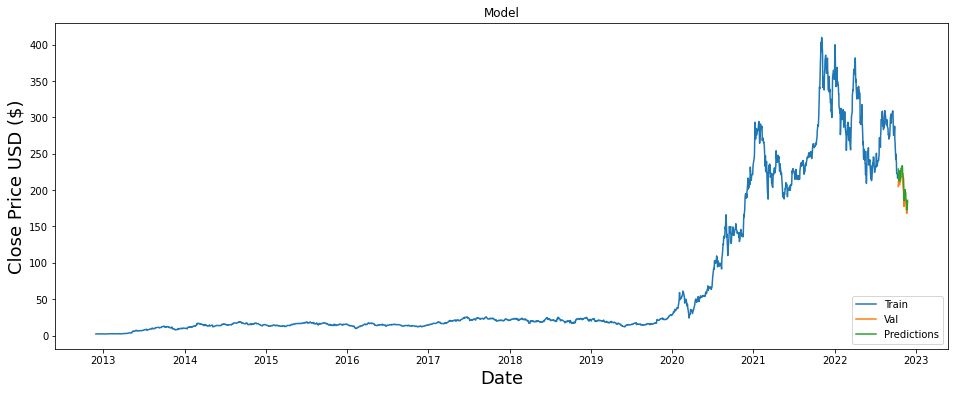

In [87]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [88]:
valid

,Close,Predictions
Date,,
2022-10-14,204.99,228.982132
2022-10-17,219.35,212.337021
2022-10-18,220.19,224.689819
2022-10-19,222.04,226.507095
2022-10-20,207.28,226.570099
2022-10-21,214.44,213.276749
2022-10-24,211.25,219.865448
2022-10-25,222.42,217.552048
2022-10-26,224.64,227.241470


<AxesSubplot:xlabel='Date'>

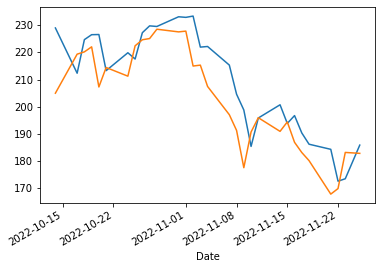

In [89]:
valid['Predictions'].plot()
valid['Close'].plot()

In [90]:
mse=mean_squared_error(valid['Close'],valid['Predictions'])

In [91]:
mape=mean_absolute_percentage_error(valid['Close'],valid['Predictions'])

In [92]:
mape

0.043139778279756825

In [93]:
mse

115.70651771968056